In [ ]:
#Import required libraries
import math
import random
import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
cd /content/drive/MyDrive/CSE202-Project

/content/drive/MyDrive/CSE202-Project


In [ ]:
def get_players(N):
  """
  Input: Number of players entering the draw(N)

  This function will write a file named players.txt to the current working directory, which will contain information of every player
  Format of file on each line - Player Name,Player Ranking,Popularity\n

  """
  with open('players.txt', 'w') as f:
    for i in range(1,N+1):
      f.write("Player " + str(i) + "," + str(i) + "," + str(round(random.uniform(0,0.5),2)) + "\n")


def get_courts(c):
  """
  Input: Number of courts available at our disposal(c)

  This function will write a file named courts.txt to the current working directory, which will contain information of every court
  Format of file on each line - Court Name,Seating Capacity,Ticket Price\n

  """
  with open('courts.txt', 'w') as f:
    for i in range(1,c+1):
      f.write("Court " + str(i) + "," + str(random.randint(1000,50000)) + "," + str(random.randint(100,600)) +"\n")

def get_fixture_day_1(N):
  """
  Input: Number of players left for a day's fixture in the top half

  This function will write a file named fixture_day_1.txt to the current working directory, which will contain information of every fixture
  Format of file on each line - Player 1 Ranking,Player 2 Ranking\n


  The fixture for every day in the tournament is simulated assuming that in every match-up, the highest ranked player wins 

  """
  day_1 = [i  for i in range(1,N + 1) if i%2==1]
  index = 0
  with open('fixture_day_1.txt', 'w') as f:
    while(index < (len(day_1)/2)):
      f.write(str(day_1[index]) + "," + str(day_1[len(day_1)-index - 1]) + "\n")
      index += 1

def get_fixture_day_2(N):
  """
  Input: Number of players left for a day's fixture in the bottom half

  This function will write a file named fixture_day_1.txt to the current working directory, which will contain information of every fixture
  Format of file on each line - Player 1 Ranking,Player 2 Ranking\n

  The fixture for every day in the tournament is simulated assuming that in every match-up, the highest ranked player wins 

  """
  day_2 = [i for i in range(1,N + 1) if i%2==0]
  index = 0
  with open('fixture_day_2.txt', 'w') as f:
    while(index < (len(day_2)/2)):
      f.write(str(day_2[index]) + "," + str(day_2[len(day_2)-index - 1]) + "\n")
      index += 1

In [ ]:
def isTournamentPossible(N,d,c):
  """
  Input:  Number of players entering the draw(N), Number of days over which the tournament
          can be held(d), and Number of courts available(c)

  Return: True, if the tournament can be scheduled satisfying all constraints, else False
  """
  #If constraints for the tournament are not met, return False
  if (d<int(2*math.log(N,2))) or (N & (N-1) != 0) or (c<N/16):
    return False
  
  return True

In [ ]:
def getFixturesForADay(day):
  """
  Input: Day for which the fixtures are to read from file

  This function will read fixtures for a particular day from Input file (dynamic input)

  Return: Fixtures list which is of the form (Integer,Integer) specifying the ranks of players in the match-up
  """
  Fixtures = []

  #Read file on the basis of Input Parameter day
  filename = "fixture_day_{}.txt".format(day)
  f = open(filename,"r")
  info = f.read()
  f_info = info.split("\n")[:-1]
  for line in f_info:
    tmp = line.split(",")
    Fixtures.append((int(tmp[0]),int(tmp[1])))
  f.close()
  return Fixtures

In [ ]:
def getDetails():

  """
  This function will read the Players and court information from Input files

  Return: Courts and Players list
  """
  
  courts = []
  Players = []

  f = open("courts.txt","r")
  info = f.read()
  c_info = info.split("\n")[:-1]
  for line in c_info:
    tmp = line.split(",")
    courts.append((tmp[0],int(tmp[1]),float(tmp[2])))
  f.close()

  f = open("players.txt","r")
  info = f.read()
  p_info = info.split("\n")[:-1]
  for line in p_info:
    tmp = line.split(",")
    Players.append((tmp[0],int(tmp[1]),float(tmp[2])))
  f.close()

  return courts,Players

In [ ]:
def getSchedule(courts,Players,Fixtures):

  """
  Input: Courts list, Players list, and Fixtures list for a given day

  This function will create a schedule for a day that follows all constraints and maximizes revenue.

  Return: Matches list of the form (String, Integer, Integer) representing the name of the court
          and the fixture scheduled on that court.
  """

  #List which will hold the fixtures alongwith player popularity
  popularityFixtures = []

  Matches = []

  #For every fixture, compute the joint popularity of the match-up
  for f in Fixtures:

    #(Ranking-1) will give the position of a Player in the Players list
    popularityFixtures.append((f[0],Players[f[0]-1][2],f[1],Players[f[1]-1][2]))

  #Sort the fixtures in descending order of joint popularity of the match-up
  popularityFixtures.sort(key=lambda k:-(k[1]+k[3]))
  
  courtIndex=-1

  #For every fixture assign a court
  for i,f in enumerate(popularityFixtures):

    #Once 4 matches are assigned to a court, move to the next most profitable court
    if i%4==0:
      courtIndex+=1
    
    Matches.append((courts[courtIndex][0],f[0],f[2]))    

  return Matches  

In [ ]:
def printSchedule(Matches,Players,courts):

  """
  Input:  Matches list, Players list, and courts list

  This function will print the schedule for a day in user-readable format including 
  the Court name, Player name alongwith their ranking and the revenue earned for that 
  particular match-up alongwith total revenue at the end.

  """
  courtIndex=-1

  #Total revenue for the entire day
  revenue=0

  #For every match, print the details in user-readable format
  for i,m in enumerate(Matches):
    if i%4==0:
      courtIndex+=1
      print("\n")

      #Here, since courts list is sorted on basis of profitability, m[0] would equal courts[courtIndex]
      print('\033[1m' + 'On {}'.format(courts[courtIndex][0])+'\033[0m')

    #Compute revenue for a particular match-up: (p1+p2)*(seating_capacity*ticket_price)
    #(Ranking-1) will give the position of a Player in the Players list
    temp_r = (Players[m[1]-1][2]+Players[m[2]-1][2]) * (courts[courtIndex][1]*courts[courtIndex][2])
    print("{} [{}] vs {} [{}] --> Revenue=${:.2f}".format(Players[m[1]-1][0],Players[m[1]-1][1],Players[m[2]-1][0],Players[m[2]-1][1],temp_r))

    #Add the revenue for the match-up to the total revenue
    revenue+=temp_r
  
  print('\033[1m' + "\nTotal Revenue for this round is: ${:.2f}".format(revenue) + '\033[0m')

In [ ]:
if __name__ == "__main__":
  print("Welcome to the Tennis Tournament of 2022!")
  

  while True:
    while True:
      try:
        N = int(input("\n\nEnter the Number of players entering the draw:\n"))
        d = int(input("\n\nEnter the Number of days over which the tournament can be held:\n"))
        c = int(input("\n\nEnter the Number of courts available at our disposal:\n"))
        break
      except:
        print("Please Note: Below mentioned inputs have to be an integer:")
        print("1. Number of Players\n2. Number of days over which the tournament can be held\n3. Number of courts available")
    
    if isTournamentPossible(N,d,c):
      print("\n\nWe have a great tournament coming up! Let's move on to scheduling!\n")


      #Create players and courts files on the basis of input provided by user
      get_players(N)
      get_courts(c)

      #This list will hold the average runtimes (over 10 iterations) required to get optimum schedule for each N uptill the final
      runtimes = [0] * int(np.log2(N))


      #Fetch court and Player details from input file
      courts, Players = getDetails()

      #Run the simulation of the tournament for 10 iterations
      for i in range(10):

        #Create a new N which will be updated for every knockout stage in the current iteration
        updatedN = N

        #Scheduling stops when we reach the final 2 players, i.e. when we play the final (base case)
        while(updatedN>=4):
          
          #When N=4, both the fixtures are played on the same day! (as per rules of the tournament)
          get_fixture_day_1(updatedN)
          get_fixture_day_2(updatedN)


          #Sort courts in decreasing order on basis of seating_capacity*ticket_price
          courts.sort(key=lambda k:-k[1]*k[2])

          #Fetch fixtures for a given day from input file
          Fixtures_day1 = getFixturesForADay(1)
          Fixtures_day2 = getFixturesForADay(2)


          #Capture time when we start to find an optimum schedule which maximizes revenue
          startTime = time.time()

          #Create schedule which maximizes the revenue for a particular day
          Matches_day1 = getSchedule(courts,Players,Fixtures_day1)
          Matches_day2 = getSchedule(courts,Players,Fixtures_day2)
        
          #Capture time when the optimum schedule is found
          endTime = time.time()

          #Print the schedule for Day1 and Day2 once at the start (1st knockout stage) when we are at the 1st simulation of the tournament
          if(i==0 and updatedN == N): 
            #Print the details in user-readable format
            print("For the First Knockout Stage, we have the schedule as:\n")

            print('\033[1m' + "For Day 1 (1st or Top Half):" +'\033[0m')
            printSchedule(Matches_day1,Players,courts)

            print('\033[1m' + "\n\nFor Day 2 (2nd or Bottom Half):" +'\033[0m')
            printSchedule(Matches_day2,Players,courts)
          

          #Add to the runtimes for every iteration for current number of players in the draw
          #Note: Since N will always be a power of 2 at every stage, we use log base 2 for indexing
          runtimes[int(np.log2(updatedN)) - 1] += (endTime-startTime)

          #Number of players are halved (eliminated) for the next round
          updatedN=updatedN//2
          
          #Number of days after every round for both the halves decrease by 2 as each half complete their matches on a single day
          d=d-2

    else:
      print("\n\nSorry! With these inputs, a valid tournament cannot be scheduled!")
      
    flag = input("\nWant to try again? Y/N\n")
    if flag.upper() != "Y":
      break

Streaming output truncated to the last 5000 lines.
Player 16606 [16606] vs Player 1031972 [1031972] --> Revenue=$27648.95
Player 18680 [18680] vs Player 1029898 [1029898] --> Revenue=$27648.95
Player 20182 [20182] vs Player 1028396 [1028396] --> Revenue=$27648.95
Player 22628 [22628] vs Player 1025950 [1025950] --> Revenue=$27648.95


On Court 26392
Player 22974 [22974] vs Player 1025604 [1025604] --> Revenue=$27636.00
Player 23104 [23104] vs Player 1025474 [1025474] --> Revenue=$27636.00
Player 23162 [23162] vs Player 1025416 [1025416] --> Revenue=$27636.00
Player 23382 [23382] vs Player 1025196 [1025196] --> Revenue=$27636.00


On Court 26521
Player 23842 [23842] vs Player 1024736 [1024736] --> Revenue=$27636.00
Player 25678 [25678] vs Player 1022900 [1022900] --> Revenue=$27636.00
Player 27370 [27370] vs Player 1021208 [1021208] --> Revenue=$27636.00
Player 28090 [28090] vs Player 1020488 [1020488] --> Revenue=$27636.00


On Court 62309
Player 29460 [29460] vs Player 1019118 [101911

In [ ]:
#For simulation of a tournament, total runtime would be the total of execution time for N and all other execution times up till N=2
totalRuntimes = [0] * len(runtimes)

for i in range(len(runtimes)-1,0,-1):
  totalRuntimes[i] = sum(runtimes[:i+1])

Text(0, 0.5, 'Average Execution Time (seconds)')

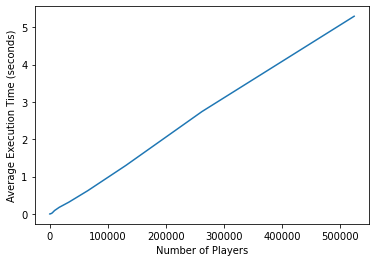

In [ ]:
#Plot graph of average run times over 10 iterations for simulation of entire tournament for each N value

avgRuntimes = [r/10 for r in totalRuntimes[1:]]
plt.plot([2**i for i in range(1,len(avgRuntimes)+1)],avgRuntimes)
plt.xlabel("Number of Players")
plt.ylabel("Average Execution Time (seconds)")

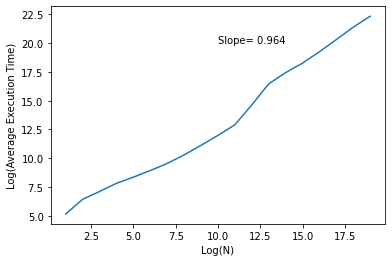

In [ ]:
#Plot the log-log graph of Execution time vs Number of players

#Log value of N (number of players)
p_log=[math.log2(i) for i in [2**j for j in range(1,len(avgRuntimes)+1)]]

#Log value of execution time 
e_log=[math.log2(i*1000000) for i in avgRuntimes]

plt.plot(p_log,e_log)

#Fetch the slope value to get the order of execution time
slope, intercept = np.polyfit(np.array(p_log), np.array(e_log), 1)
plt.xlabel("Log(N)")
plt.ylabel("Log(Average Execution Time)")
plt.text(10,20,"Slope= {:.3f}".format(slope))
plt.show()

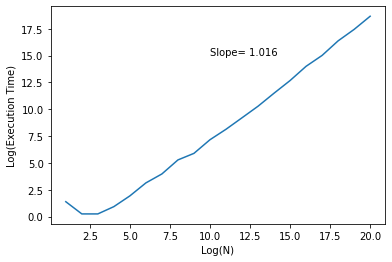

In [ ]:
#Experiment to check the if the slope we got matches the order of nlogn 

#Start at N=2
n1 = 2

#List to store execution times
runtimes1 = []

while n1<=1048576:
  
  #Create a temp list of size n1 (representative of number of players)
  temp = []
  for i in range(n1):
    temp.append(np.random.randint(0,n1))
  
  #Record start time of execution (sorting)
  t1 = time.time()

  #Sort the randomly generated list
  temp.sort()

  #Record end time of execution (sorting)
  t2 = time.time()

  #Add the total execution time to the list
  runtimes1.append(t2-t1)

  #Double the list of players
  n1 = n1*2

#Plot the log-log graph of Execution time (sorting) vs N
p_log=[math.log2(i) for i in [2**j for j in range(1,len(runtimes1)+1)]]
e_log=[math.log2(i*1000000) for i in runtimes1]
plt.plot(p_log,e_log)
slope, intercept = np.polyfit(np.array(p_log), np.array(e_log), 1)
plt.xlabel("Log(N)")
plt.ylabel("Log(Execution Time)")
plt.text(10,15,"Slope= {:.3f}".format(slope))
plt.show()